<a href="https://colab.research.google.com/github/ibrahimHeritch/Neural-Networks/blob/master/function_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

Rules:
 1) Data from 1 to 100
 2) fixed interval between input (1 unit)
 3) 1 variable
 4) Equation Types: linear, quadratic, cubic, hyperbolic, exponetial, square root
  linear: aX+b
  Quadratic: a(X+b)^2+cX+d
  cubic: e(X+g)^3+a(X+b)^2+cX+d
  hyperbolic: a/(bX+c)+d
  exponential: ae^(b(X+c))+d
  sgrt: a sqrt(b(X+c))+d
 

In [0]:
import random as rand

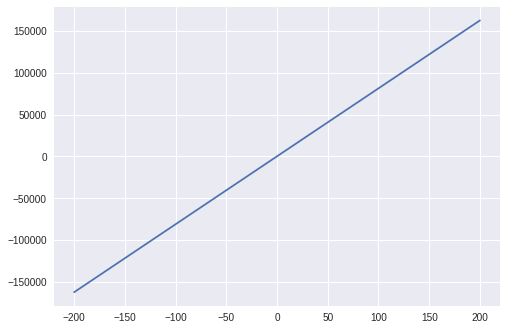

In [46]:
import matplotlib.pyplot as plot
def linear():
  a=rand.uniform(-1000,1000)
  b=rand.uniform(-1000,1000)

  return [((a*x)+b)+rand.uniform(-1,1) for x in range(-200,201)]
plot.plot(range(-200,201),linear())

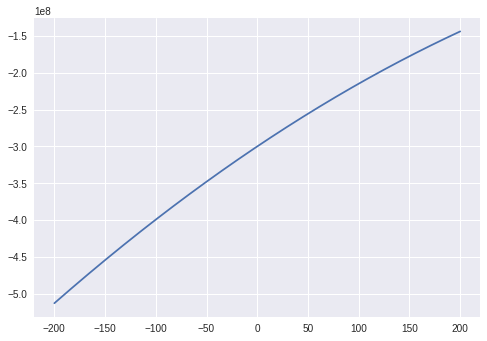

In [47]:
def quad():
  #a(X+b)^2+cX+d
  a=rand.uniform(-1000,1000)
  b=rand.uniform(-1000,1000)
  c=rand.uniform(-1000,1000)
  d=rand.uniform(-1000,1000)
  return [(a*((X+b)**2)+d)+rand.uniform(-1,1) for X in range(-200,201)]
plot.plot(range(-200,201),quad())

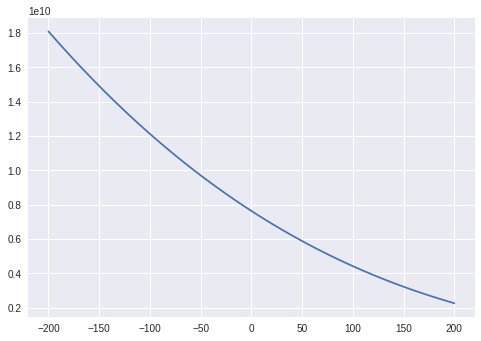

In [48]:
def cube():
  #e(X+g)^3+a(X+b)^2+cX+d 
  e=rand.uniform(-1000,1000)
  g=rand.uniform(-1000,1000)
  a=rand.uniform(-1000,1000)
  b=rand.uniform(-1000,1000)
  c=rand.uniform(-1000,1000)
  d=rand.uniform(-1000,1000)
  return [((e*(X+g)**3)+d)+rand.uniform(-1,1) for X in range(-200,201)]
plot.plot(range(-200,201),cube())

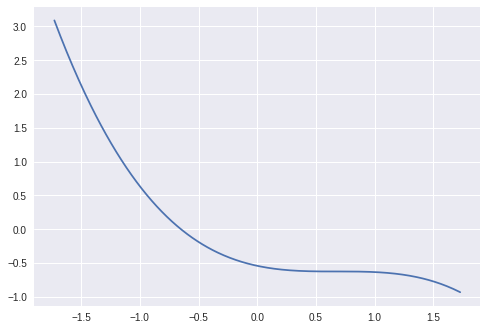

In [49]:
def normalize(x):
  m=np.mean(x)
  sd=np.std(x)
  return [(X-m)/sd for X in x]
plot.plot(normalize(range(-200,201)),normalize(cube()))

In [50]:
Data=[[normalize(linear()),0] for _ in range(0,1001)]+[[normalize(quad()),1] for _ in range(0,901)]+[[normalize(cube()),2] for _ in range(0,1101)]
print(Data[0])
rand.shuffle(Data)

[[-1.7277717311125822, -1.7191333539417495, -1.7104541674940774, -1.701801203387523, -1.6932142073574337, -1.6845356612234696, -1.6759258769766983, -1.6672481953018083, -1.6586441422662135, -1.6500234522566537, -1.641370947235148, -1.6327017384639733, -1.6240622664496382, -1.6154331025216784, -1.606825227319849, -1.5981708296549102, -1.5895533965574336, -1.5808386310745761, -1.5722166258347379, -1.56360444169811, -1.5549837814018712, -1.5462968870626281, -1.5377109915500635, -1.529021536207668, -1.520415446905263, -1.5117330700344547, -1.503113081012543, -1.4944936290546473, -1.4858417462720288, -1.4771764076387615, -1.4685818480558543, -1.459956157531483, -1.4512825668722267, -1.4426911887896188, -1.4340220066091602, -1.4253988431683837, -1.4167695851473145, -1.408130590094065, -1.3995019098166361, -1.3907978877857068, -1.3821512594258463, -1.3735838276925914, -1.364907096477893, -1.3562926320004896, -1.3476278555163783, -1.3389554057368724, -1.330354909368821, -1.3217502578444376, -1

In [51]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

x_train=np.array([D[0] for D in Data])
y_train=np.array(to_categorical([D[1] for D in Data]))
test=[[normalize(linear()),0] for _ in range(0,3401)]+[[normalize(quad()),1] for _ in range(0,4002)] +[[normalize(cube()),2] for _ in range(0,5009)]
rand.shuffle(test)
x_test=np.array([D[0] for D in test])
y_test=np.array(to_categorical([D[1] for D in test]))
print(y_train)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [0]:
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='elu', input_shape=(401,)))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(3, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [53]:
# build the model
model = classification_model()

# fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=150, verbose=2)

# evaluate the model
print(model.evaluate(x_test, y_test, verbose=0))

Train on 3003 samples, validate on 12412 samples
Epoch 1/150
 - 1s - loss: 0.8708 - acc: 0.5621 - val_loss: 0.5469 - val_acc: 0.7345
Epoch 2/150
 - 0s - loss: 0.4189 - acc: 0.8222 - val_loss: 0.3967 - val_acc: 0.8343
Epoch 3/150
 - 0s - loss: 0.3534 - acc: 0.8375 - val_loss: 0.3858 - val_acc: 0.8336
Epoch 4/150
 - 0s - loss: 0.3337 - acc: 0.8388 - val_loss: 0.3620 - val_acc: 0.8212
Epoch 5/150
 - 0s - loss: 0.3158 - acc: 0.8541 - val_loss: 0.3512 - val_acc: 0.8311
Epoch 6/150
 - 0s - loss: 0.3115 - acc: 0.8575 - val_loss: 0.3421 - val_acc: 0.8366
Epoch 7/150
 - 0s - loss: 0.3025 - acc: 0.8591 - val_loss: 0.3336 - val_acc: 0.8460
Epoch 8/150
 - 0s - loss: 0.2964 - acc: 0.8608 - val_loss: 0.3240 - val_acc: 0.8246
Epoch 9/150
 - 0s - loss: 0.2828 - acc: 0.8665 - val_loss: 0.2994 - val_acc: 0.8443
Epoch 10/150
 - 0s - loss: 0.2820 - acc: 0.8691 - val_loss: 0.2928 - val_acc: 0.8489
Epoch 11/150
 - 0s - loss: 0.2629 - acc: 0.8751 - val_loss: 0.3254 - val_acc: 0.8467
Epoch 12/150
 - 0s - loss

In [57]:
print(model.predict(np.array([[(x**3*1.1)+(x**2*1.1)+2.3*x for x in range(-200,201)]])))



[[0. 0. 1.]]


In [68]:
print(model.predict(np.array([[(x**3*0.0000001)+(x**2*0.00000001)+2000.3*x for x in range(-200,201)]])))

[[0. 1. 0.]]


In [61]:
print(model.predict(np.array([[(x**3*0.006)+(x**2*2000.0)+2.3*x for x in range(-200,201)]])))

[[0. 1. 0.]]


Coefficients play a role